# Modelo de regresión logística

In [2]:
#Cargar Las Librerias necesarias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import seaborn as sns
# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [5]:
# Lectura de datos en Python y Lo carganos en la variable Datos
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [8]:
# Realizamos Lectura de los Datos para el análisis exploratonio
Datos.head(891)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

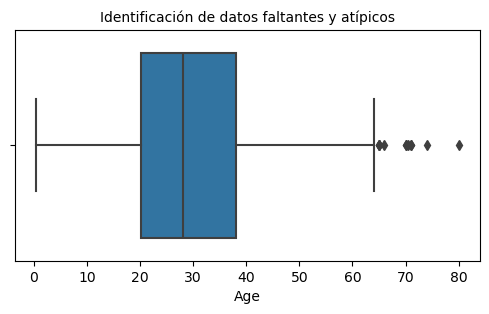

In [11]:
# Identificación de datos faltantes y atípicos
plt. figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

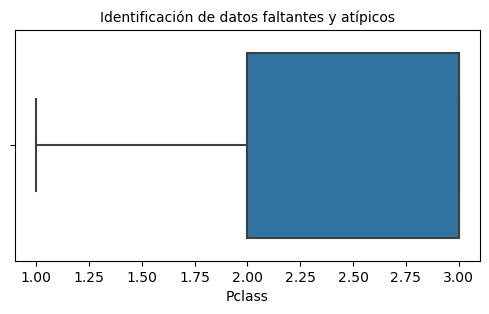

In [14]:
# Identificación de datos faltantes y atípicos
plt. figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

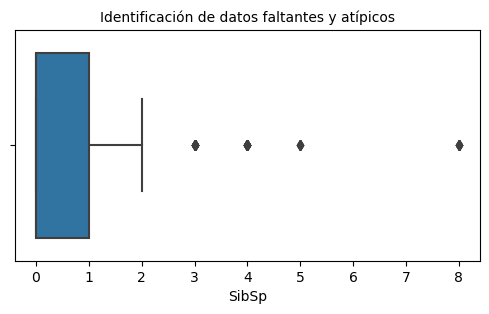

In [16]:
# Identificación de datos faltantes y atípicos
plt. figure(figsize=(6, 3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10 )

In [17]:
# Revisión de datos faltantes
print("Cantidad de registros con cero en edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de registros con cero en Pclass: ",Datos ['Pclass'].isin([0]).sum())

Cantidad de registros con cero en edad:  0
Cantidad de registros con cero en Pclass:  0


In [22]:
#Conteo de datos atípicos
nivel_minimo= 1
nivel_maximo= 100
Total_Atipicos=((Datos['Age']<nivel_minimo) | (Datos ['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 7


In [28]:
# Definir los niveles mínimos y máximos
nivel_minimo = 1
nivel_maximo = 100

# Filtrar los datos dentro del rango permitido
Datos_filtrados = Datos[(Datos['Age'] >= nivel_minimo) & (Datos['Age'] <= nivel_maximo)]

# Mostrar el resultado
print(Datos_filtrados)

# Obtener la cantidad de datos después de filtrar
cantidad_datos_filtrados = Datos_filtrados.shape[0]
# Mostrar la cantidad de datos
print("La cantidad de datos después de eliminar los atípicos es {}".format(cantidad_datos_filtrados))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [35]:
# Filtrar los datos dentro del rango permitido
Datos_filtrados = Datos[(Datos['Age'] >= nivel_minimo) & (Datos['Age'] <= nivel_maximo)]

Total_Atipicos_filtrados = ((Datos_filtrados['Age'] < nivel_minimo) | (Datos_filtrados['Age'] > nivel_maximo)).sum()

# Mostrar el resultado
print("El total de datos atípicos después de filtrar es {}".format(Total_Atipicos_filtrados))

El total de datos atípicos después de filtrar es 0


In [44]:
# Revisión del tipo de datos y datos faltantes

Datos_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  707 non-null    int64  
 1   Survived     707 non-null    int64  
 2   Pclass       707 non-null    int64  
 3   Name         707 non-null    object 
 4   Sex          707 non-null    object 
 5   Age          707 non-null    float64
 6   SibSp        707 non-null    int64  
 7   Parch        707 non-null    int64  
 8   Ticket       707 non-null    object 
 9   Fare         707 non-null    float64
 10  Cabin        184 non-null    object 
 11  Embarked     705 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.8+ KB


In [43]:
# Característica relevante para entrenar el modelo: condition 0 = no sobrevivió, 1 =sobrevivió

In [45]:
# número total de personas enfermas
Datos_filtrados['Survived'].value_counts()

Survived
0    424
1    283
Name: count, dtype: int64

In [59]:
Datos_filtrados[['Survived']].head(20)

,Survived
0,0
1,1
2,1
3,1
4,0
6,0
7,0
8,1
9,1
10,1


In [60]:

Datos_sin_texto = Datos_filtrados.drop(columns=['Name','Embarked','Cabin','Sex','Ticket'])

# Mostrar el DataFrame sin la columna 'Name' (opcional)
print(Datos_sin_texto)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
885          886         0       3  39.0      0      5  29.1250
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[707 rows x 7 columns]


In [65]:
# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%
# Se crean variables X y Y para almacenar la información del entrenamiento
X = Datos_sin_texto.drop( 'Survived',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = Datos_sin_texto['Survived'] # Se cargan los datos de train con los datos de la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques, uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,stratify=Y, random_state= 0)

In [66]:
print (X_train)

     PassengerId  Pclass   Age  SibSp  Parch      Fare
748          749       1  19.0      1      0   53.1000
327          328       2  36.0      0      0   13.0000
195          196       1  58.0      0      0  146.5208
117          118       2  29.0      1      0   21.0000
515          516       1  47.0      0      0   34.0208
..           ...     ...   ...    ...    ...       ...
314          315       2  43.0      1      1   26.2500
80            81       3  22.0      0      0    9.0000
254          255       3  41.0      0      2   20.2125
238          239       2  19.0      0      0   10.5000
433          434       3  17.0      0      0    7.1250

[530 rows x 6 columns]


In [67]:
print (Y_train)

748    0
327    1
195    1
117    0
515    0
      ..
314    0
80     0
254    0
238    0
433    0
Name: Survived, Length: 530, dtype: int64


In [68]:
# Construir el modelo de regresión logística

modelo_regresion = LogisticRegression(solver = "liblinear") # Liblinear es una librería para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train, Y_train)
# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # La función predict predice los valores a partir del conjunto de datos de validación

In [69]:
print(Y_test)

137    0
660    1
338    1
341    1
237    1
      ..
508    0
862    1
408    0
401    0
370    1
Name: Survived, Length: 177, dtype: int64


In [70]:
print(Prediccion)

[1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1]


In [71]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       106
           1       0.70      0.45      0.55        71

    accuracy                           0.70       177
   macro avg       0.70      0.66      0.66       177
weighted avg       0.70      0.70      0.68       177



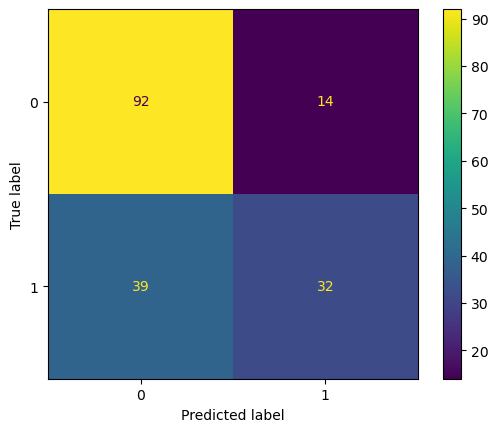

In [72]:
# Matriz de confusión del modelo
cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

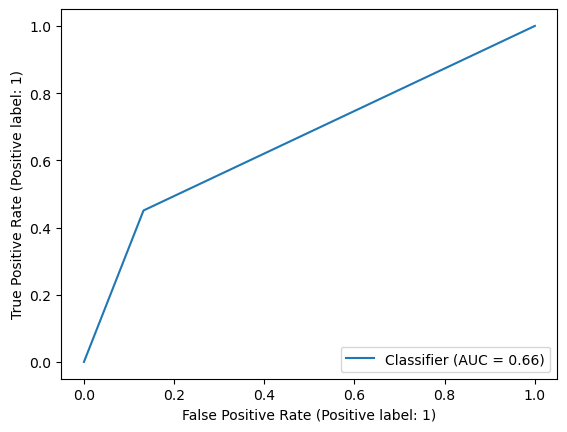

In [73]:
# Curva de precisión del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()